<a href="https://colab.research.google.com/github/Milosz-cat/Data-Structure-Project/blob/main/DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

# Wczytanie zbioru danych CIFAR-10 z biblioteki Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


In [ ]:
import h5py

with h5py.File('cifar10.h5', 'w') as f:
    # Tworzenie grupy dla danych treningowych
    grp_train = f.create_group("train")
    # Tworzenie zbiorów dla danych treningowych
    dset_X_train = grp_train.create_dataset("x", data=x_train, compression="gzip", compression_opts=9)
    dset_y_train = grp_train.create_dataset("y", data=y_train, compression="gzip", compression_opts=9)

    # Tworzenie grupy dla danych testowych
    grp_test = f.create_group("test")
    # Tworzenie zbiorów dla danych testowych
    dset_X_test = grp_test.create_dataset("x", data=x_test, compression="gzip", compression_opts=9)
    dset_y_test = grp_test.create_dataset("y", data=y_test, compression="gzip", compression_opts=9)


In [ ]:
import h5py

with h5py.File('cifar10.h5', 'r') as f:
    # Wczytywanie danych treningowych
    x_train = f['train']['x'][:]
    y_train = f['train']['y'][:]
    
    # Wczytywanie danych testowych
    x_test = f['test']['x'][:]
    y_test = f['test']['y'][:]

In [ ]:
# # Przekształcenie obrazów z CIFAR-10 na obrazy binarne
# threshold = 0.5
# x_train_binary = np.where(x_train > threshold, 1, 0)
# x_test_binary = np.where(x_test > threshold, 1, 0)

# # Zapisanie obrazów binarnych do plików binarnych
# with open('x_train_binary.bin', 'wb') as f:
#     x_train_binary.tofile(f)
    
# with open('x_test_binary.bin', 'wb') as f:
#     x_test_binary.tofile(f)


# # Wczytanie danych treningowych z pliku binarnego
# x_train_binary = np.fromfile('x_train_binary.bin', dtype=np.uint8)
# x_train_binary = x_train_binary.reshape(-1, 32, 32, 3)

# # Wczytanie danych testowych z pliku binarnego
# x_test_binary = np.fromfile('x_test_binary.bin', dtype=np.uint8)
# x_test_binary = x_test_binary.reshape(-1, 32, 32, 3)

In [ ]:
#towrzenie macierzy binarnej
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Konwersja koloru obrazów z RGB na grayscale
x_train_gray = tf.image.rgb_to_grayscale(x_train)
x_test_gray = tf.image.rgb_to_grayscale(x_test)

# Normalizacja wartości pikseli do zakresu [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [ ]:
# Definicja modelu konwolucyjnego
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


# Trenowanie modelu na danych treningowych
model.fit(tf.constant(x_train), y_train, batch_size=32, epochs=10, validation_data=(tf.constant(x_test), y_test))


Epoch 1/10
1563/1563 [==============================] - 95s 60ms/step - loss: 1.4520 - accuracy: 0.4721 - val_loss: 1.2571 - val_accuracy: 0.5614
Epoch 2/10
1563/1563 [==============================] - 96s 62ms/step - loss: 1.0631 - accuracy: 0.6240 - val_loss: 1.0443 - val_accuracy: 0.6320
Epoch 3/10
1563/1563 [==============================] - 92s 59ms/step - loss: 0.9065 - accuracy: 0.6834 - val_loss: 0.8934 - val_accuracy: 0.6876
Epoch 4/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.7983 - accuracy: 0.7195 - val_loss: 0.8660 - val_accuracy: 0.7021
Epoch 5/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.7049 - accuracy: 0.7529 - val_loss: 0.8449 - val_accuracy: 0.7127
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.6290 - accuracy: 0.7781 - val_loss: 0.8576 - val_accuracy: 0.7078
Epoch 7/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.5659 - accuracy: 0.8012 - val_loss: 0.8389 -

1/1 [==============================] - 0s 326ms/step
samolot: 8.87%
samochód: 8.87%
ptak: 8.88%
kot: 8.93%
jeleń: 14.08%
pies: 9.08%
żaba: 8.87%
koń: 14.69%
statek: 8.87%
ciężarówka: 8.87%
Predykcja dla obrazu: koń


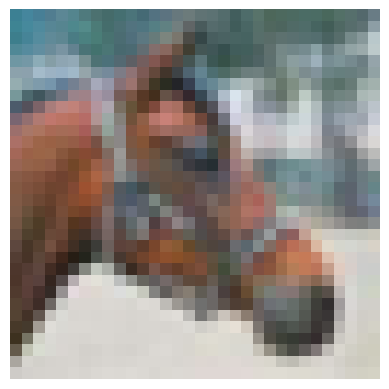

In [ ]:
import matplotlib.pyplot as plt

# Predykcja na pojedynczym obrazie
image = x_test[17]
prediction = model.predict(np.expand_dims(image, axis=0))
predicted_label = np.argmax(prediction[0])
class_probabilities = tf.nn.softmax(prediction[0])

# Wydrukowanie procentowych wartości predykcji dla każdej klasy
class_names = ["samolot", "samochód", "ptak", "kot", "jeleń", "pies", "żaba", "koń", "statek", "ciężarówka"]
for i in range(len(class_names)):
    class_name = class_names[i]
    class_prob = class_probabilities[i] * 100
    print(f"{class_name}: {class_prob:.2f}%")

# Wyświetlenie obrazu i jego etykiety

print(f"Predykcja dla obrazu: {class_names[predicted_label]}")
plt.imshow(x_test[17], cmap='gray')
plt.axis("off")
plt.show()